# Modeling the Data

 

In [314]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
import seaborn as sns
sns.set()
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
# Load in the training set
track_features =pd.read_csv('/content/drive/MyDrive/Spotify/data/track_features/tf_mini.csv')
training_set = pd.read_csv('/content/drive/MyDrive/Spotify/data/training_set/log_mini.csv')
 
 

track_data = pd.read_pickle("/content/drive/MyDrive/Spotify/data/track_features.pkl")

# Using skip_2 as the ground truth
training_set['skipped'] = (training_set.skip_2 | training_set.skip_1).astype('int32')
training_set = training_set.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])
training_set.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0


In [317]:
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [318]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
track_id                  50704 non-null object
duration                  50704 non-null float64
release_year              50704 non-null int64
us_popularity_estimate    50704 non-null float64
acousticness              50704 non-null float64
beat_strength             50704 non-null float64
bounciness                50704 non-null float64
danceability              50704 non-null float64
dyn_range_mean            50704 non-null float64
energy                    50704 non-null float64
flatness                  50704 non-null float64
instrumentalness          50704 non-null float64
key                       50704 non-null int64
liveness                  50704 non-null float64
loudness                  50704 non-null float64
mechanism                 50704 non-null float64
mode                      50704 non-null object
organism                  50704 non-null float64
speechiness    

In [319]:
 track_data = track_data.drop("mode", axis=1)

In [320]:
# Convert the columns to all be consistantly numeric
track_data.iloc[:,1:] = track_data.iloc[:,1:].astype('float32')
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950.0,99.975418,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4.0,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950.0,99.969429,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3.0,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951.0,99.602547,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4.0,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951.0,99.665016,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4.0,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951.0,99.991760,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4.0,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [321]:
# Join the two together
session_data = (
    training_set[['session_id','session_position','track_id_clean', 'skipped']]
    .merge(
        track_data,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
session_data.head()


,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,...,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,...,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,...,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [322]:
session_data.drop(columns=['track_id'])

,session_id,session_position,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,...,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,...,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,...,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,0,216.689484,2018.0,99.997604,0.098337,0.548632,0.658323,0.596480,...,5.0,0.661081,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,1,186.453323,2018.0,99.861565,0.449629,0.487708,0.608612,0.557520,...,4.0,0.109420,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,1,214.047348,2018.0,97.243820,0.017628,0.649367,0.682610,0.489405,...,4.0,0.389913,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,1,218.260818,2018.0,99.998451,0.030127,0.818798,0.879947,0.964383,...,4.0,0.338321,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,1,60.000000,2018.0,99.957436,0.332467,0.751500,0.843354,0.914082,...,4.0,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421


In [ ]:
#session_data=pd.DataFrame()

In [323]:
 psession_data=session_data.add_prefix('previous_')

In [324]:
full_session_data = pd.concat((
    session_data, psession_data),axis=1
     )

In [ ]:
# full_session_data.to_pickle("data/pickles/current_and_previous_data.pkl")
#full_session_data = pd.read_pickle("/content/drive/MyDrive/Spotify/data/track_features.pkl")

In [325]:
# Examine the columns
full_session_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 64 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
skipped                            167880 non-null int32
track_id                           167880 non-null object
duration                           167880 non-null float32
release_year                       167880 non-null float32
us_popularity_estimate             167880 non-null float32
acousticness                       167880 non-null float32
beat_strength                      167880 non-null float32
bounciness                         167880 non-null float32
danceability                       167880 non-null float32
dyn_range_mean                     167880 non-null float32
energy                             167880 non-null float32
flatness                           167880 non-null float32
instrumentalness                   167880 non-null float32
key       

In [326]:
fsd=full_session_data.drop(columns=["track_id",'session_id','previous_track_id','previous_session_id' ],axis=1)

In [327]:
fsd.head()

,session_position,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,1,0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,2,0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,...,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,3,0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,...,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,4,0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,...,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,5,0,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [328]:
data=fsd.values
X, y = data[:, :-1],data[:, -1]
print(X.shape, y.shape)
# split into train test sets
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((167880, 59), (167880,))
((112479, 59), (55401, 59), (112479,), (55401,))


Starting with a Logistic Regression approach

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



('Mean Absolute Error:', 1.8329236280317096e-15)
('Mean Squared Error:', 4.924684724491273e-30)
('Root Mean Squared Error:', 2.219163068476779e-15)


In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

3.249484015199755e-14
[-4.62700212e-18  2.85924442e-17  1.79706510e-17  3.44776291e-17
 -1.04083409e-17  2.04697370e-16  1.53262819e-15 -2.33146835e-15
  7.97972799e-17 -6.24500451e-17 -5.82867088e-16 -3.05311332e-16
 -2.08166817e-16 -1.38777878e-16 -1.94289029e-16  8.32667268e-17
 -1.11022302e-16 -1.52655666e-16  0.00000000e+00 -1.66533454e-16
 -1.66533454e-16 -5.55111512e-17 -4.44089210e-16  3.00107161e-16
 -7.45931095e-16  1.66533454e-16 -2.49800181e-16  2.22044605e-16
  4.30211422e-16  1.00000000e+00  8.32667268e-17  1.04083409e-17
 -1.80519662e-17 -4.85722573e-17  9.71445147e-17  1.94289029e-16
  1.55431223e-15 -2.37310172e-15  1.24900090e-16  6.93889390e-17
 -6.24500451e-16 -3.50414142e-16 -1.38777878e-16 -2.42861287e-17
 -2.32452946e-16  1.38777878e-17 -1.94289029e-16 -3.15719673e-16
 -3.88578059e-16  9.71445147e-17 -8.32667268e-17  7.63278329e-17
 -4.30211422e-16  3.15719673e-16 -7.49400542e-16  9.71445147e-17
 -2.77555756e-16  1.37469796e-16  2.70882138e-16]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,0.234602,0.234602
1,0.224726,0.224726
2,0.250408,0.250408
3,0.163687,0.163687
4,0.211679,0.211679
5,0.189963,0.189963
6,0.161721,0.161721
7,0.176507,0.176507
8,0.160543,0.160543
9,0.184353,0.184353


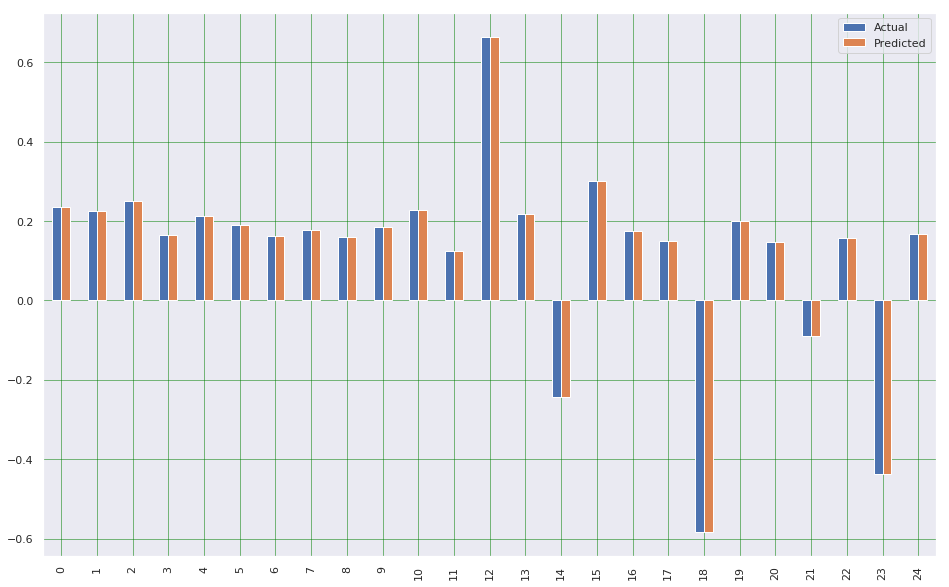

In [ ]:
df1 = data1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [332]:
X = fsd
 
y = fsd.skipped
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=0
)
X.head(20)

,session_position,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,1,0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,2,0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,...,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,3,0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,...,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,4,0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,...,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,5,0,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
5,6,0,216.689484,2018.0,99.997604,0.098337,0.548632,0.658323,0.596480,10.416269,...,5.0,0.661081,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233
6,7,1,186.453323,2018.0,99.861565,0.449629,0.487708,0.608612,0.557520,9.834414,...,4.0,0.109420,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836
7,8,1,214.047348,2018.0,97.243820,0.017628,0.649367,0.682610,0.489405,9.900208,...,4.0,0.389913,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909
8,9,1,218.260818,2018.0,99.998451,0.030127,0.818798,0.879947,0.964383,15.037571,...,4.0,0.338321,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350
9,10,1,60.000000,2018.0,99.957436,0.332467,0.751500,0.843354,0.914082,14.457762,...,4.0,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421


In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:

# Train a Logistic Regression model and score
scaler = StandardScaler().fit(X_train)
sX_train = scaler.transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)

log = LogisticRegressionCV(
    cv=3
).fit(
    sX_train,
    y_train
)

print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float32, int32 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float32, int32 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float32, int32 were all converted to float64 by StandardScaler.
  


Log Train score: 1.0
Log Val score:   1.0
Log Test score:  1.0


In [335]:
log

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [336]:
for pair in sorted(zip(X.columns,log.coef_[0]),key=lambda p: np.abs(p[1]),reverse=True):
    print("%30s | % .8f" % pair)

                       skipped |  1.06558413
              previous_skipped |  1.06558413
              session_position |  0.01611736
     previous_session_position |  0.01611736
                      duration |  0.00668509
             previous_duration |  0.00668509
                  release_year | -0.00612434
         previous_release_year | -0.00612434
                  acousticness | -0.00597478
         previous_acousticness | -0.00597478
             acoustic_vector_0 | -0.00518214
    previous_acoustic_vector_0 | -0.00518214
             acoustic_vector_5 | -0.00467181
    previous_acoustic_vector_5 | -0.00467181
             acoustic_vector_6 | -0.00437042
    previous_acoustic_vector_6 | -0.00437042
             acoustic_vector_4 | -0.00390657
    previous_acoustic_vector_4 | -0.00390657
                 beat_strength | -0.00379544
        previous_beat_strength | -0.00379544
             acoustic_vector_3 |  0.00338103
    previous_acoustic_vector_3 |  0.00338103
          

In [337]:
# Train a Random Forest model and score
rfc = RandomForestClassifier(
    n_estimators=100
).fit(
    X_train,
    y_train
)

print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 1.0
RFC Val score:   1.0
RFC Test score:  1.0


In [338]:
for pair in sorted(zip(X.columns,rfc.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%30s | % .8f" % pair)

                       skipped |  0.54533380
              previous_skipped |  0.43966550
              session_position |  0.00177486
     previous_session_position |  0.00139359
previous_us_popularity_estimate |  0.00050033
        us_popularity_estimate |  0.00044244
             acoustic_vector_0 |  0.00035660
    previous_acoustic_vector_0 |  0.00031619
                      duration |  0.00029725
    previous_acoustic_vector_3 |  0.00028946
             previous_duration |  0.00027146
                      flatness |  0.00024881
    previous_acoustic_vector_4 |  0.00024704
                  release_year |  0.00024316
             acoustic_vector_4 |  0.00024296
             acoustic_vector_6 |  0.00024192
             previous_liveness |  0.00023990
    previous_acoustic_vector_1 |  0.00023946
                   speechiness |  0.00023707
             acoustic_vector_3 |  0.00023658
                  acousticness |  0.00023547
         previous_acousticness |  0.00023304
        p

In [339]:
xgb = XGBClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print("XGB Train score: %s" % xgb.score(X_train,y_train))
print("XGB Val score:   %s" % xgb.score(X_val,y_val))
print("XGB Test score:  %s" % xgb.score(X_test,y_test))

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

XGB Train score: 1.0
XGB Val score:   1.0
XGB Test score:  1.0


In [340]:

for pair in sorted(zip(X.columns,xgb.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%30s | % .8f" % pair)

                       skipped |  1.00000000
              session_position |  0.00000000
                      duration |  0.00000000
                  release_year |  0.00000000
        us_popularity_estimate |  0.00000000
                  acousticness |  0.00000000
                 beat_strength |  0.00000000
                    bounciness |  0.00000000
                  danceability |  0.00000000
                dyn_range_mean |  0.00000000
                        energy |  0.00000000
                      flatness |  0.00000000
              instrumentalness |  0.00000000
                           key |  0.00000000
                      liveness |  0.00000000
                      loudness |  0.00000000
                     mechanism |  0.00000000
                      organism |  0.00000000
                   speechiness |  0.00000000
                         tempo |  0.00000000
                time_signature |  0.00000000
                       valence |  0.00000000
          

In [341]:

# Train a LightGBM model and score
lgbm = LGBMClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print()
print("LGBM Train score: %s" % lgbm.score(X_train,y_train))
print("LGBM Val score:   %s" % lgbm.score(X_val,y_val))
print("LGBM Test score:  %s" % lgbm.score(X_test,y_test))

[1]	training's binary_logloss: 0.597688	valid_1's binary_logloss: 0.597269
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.519905	valid_1's binary_logloss: 0.519558
[3]	training's binary_logloss: 0.455056	valid_1's binary_logloss: 0.454765
[4]	training's binary_logloss: 0.400247	valid_1's binary_logloss: 0.399999
[5]	training's binary_logloss: 0.353431	valid_1's binary_logloss: 0.353218
[6]	training's binary_logloss: 0.313104	valid_1's binary_logloss: 0.31292
[7]	training's binary_logloss: 0.278129	valid_1's binary_logloss: 0.27797
[8]	training's binary_logloss: 0.247625	valid_1's binary_logloss: 0.247485
[9]	training's binary_logloss: 0.220894	valid_1's binary_logloss: 0.220772
[10]	training's binary_logloss: 0.197377	valid_1's binary_logloss: 0.197269
[11]	training's binary_logloss: 0.176617	valid_1's binary_logloss: 0.176522
[12]	training's binary_logloss: 0.158238	valid_1's binary_logloss: 0.158154
[13]	training's binary_logloss: 0.141

In [342]:

for pair in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%34s | % 5d" % pair)

                          duration |   783
                  session_position |   296
            us_popularity_estimate |   256
                           skipped |   171
                      acousticness |   137
                      release_year |    86
                     beat_strength |    78
                    dyn_range_mean |    70
                          loudness |    56
                        bounciness |    51
                      danceability |    45
                            energy |    39
                 acoustic_vector_7 |    32
                 acoustic_vector_6 |    29
                          organism |    28
                  instrumentalness |    24
                 acoustic_vector_1 |    23
                          flatness |    22
                          liveness |    20
                         mechanism |    19
                 acoustic_vector_0 |    19
                             tempo |    12
                 acoustic_vector_2 |     8
           

In [343]:
lgbm_feature_importances = [[p[0], int(p[1])] for p in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True)]
lgbm_feature_importances[:5]

[['duration', 783],
 ['session_position', 296],
 ['us_popularity_estimate', 256],
 ['skipped', 171],
 ['acousticness', 137]]

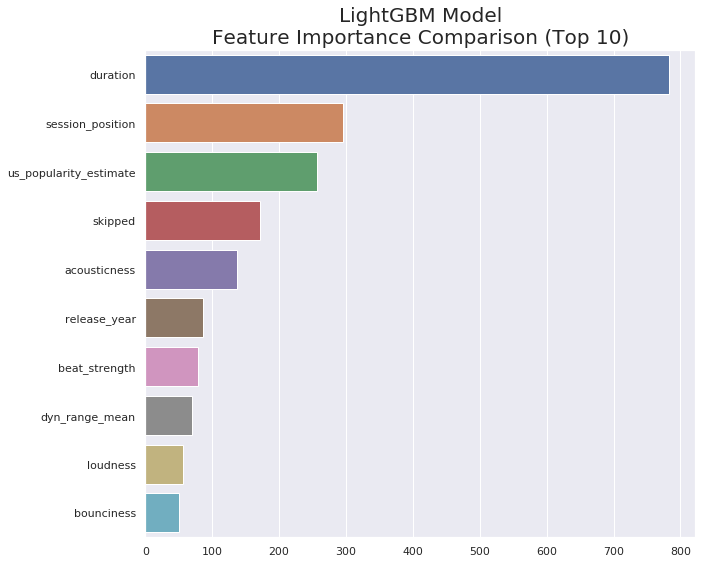

In [344]:
fi = pd.DataFrame(lgbm_feature_importances,columns=['Feature','Importance'])

plt.figure(figsize=(10,8))
sns.barplot(
    "Importance",
    "Feature",
    data=fi.head(10)
)
plt.title(
    "LightGBM Model\nFeature Importance Comparison (Top 10)",
    fontsize=20
)
plt.xlabel(
    "",
    fontsize=15
)
plt.ylabel(
    "",
    fontsize=15
)
# plt.xticks(rotation=90)
plt.tight_layout()
 
# plt.show()

In [346]:
 from sklearn.metrics import accuracy_score

In [347]:
def predict_proba(X):
    predictions = (
        log.predict_proba(scaler.transform(X))[:,1] +
        rfc.predict_proba(X)[:,1] +
        xgb.predict_proba(X)[:,1] +
        lgbm.predict_proba(X)[:,1]
    )
    return predictions / 4

def predict(X,threshold=0.5):
    return (predict_proba(X) > threshold).astype('float32')

def score(X,y):
    return accuracy_score(y,predict(X))

print("Ensemble Train Accuracy:  %.3f" % score(X_train,y_train))
print("Ensemble Val Accuracy:    %.3f" % score(X_val,y_val))
print("Ensemble Test Accuracy:   %.3f" % score(X_test,y_test))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float32, int32 were all converted to float64 by StandardScaler.
  """


Ensemble Train Accuracy:  1.000
Ensemble Val Accuracy:    1.000
Ensemble Test Accuracy:   1.000


In [348]:
ensamble_predictions = predict(X_test)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float32, int32 were all converted to float64 by StandardScaler.
  """


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [349]:
lgbm_preds = lgbm.predict(X_test)

print("LightGBM Test Precision Score: %.3f" % precision_score(y_test,lgbm_preds))
print("LightGBM Test Recall Score:    %.3f" % recall_score(y_test,lgbm_preds))
print("LightGBM Test F1 Score:        %.3f" % f1_score(y_test,lgbm_preds))

LightGBM Test Precision Score: 1.000
LightGBM Test Recall Score:    1.000
LightGBM Test F1 Score:        1.000


In [350]:
print("Ensemble Test Precision Score: %.3f" % precision_score(y_test,ensamble_predictions))
print("Ensemble Test Recall Score:    %.3f" % recall_score(y_test,ensamble_predictions))
print("Ensemble Test F1 Score:        %.3f" % f1_score(y_test,ensamble_predictions))

Ensemble Test Precision Score: 1.000
Ensemble Test Recall Score:    1.000
Ensemble Test F1 Score:        1.000


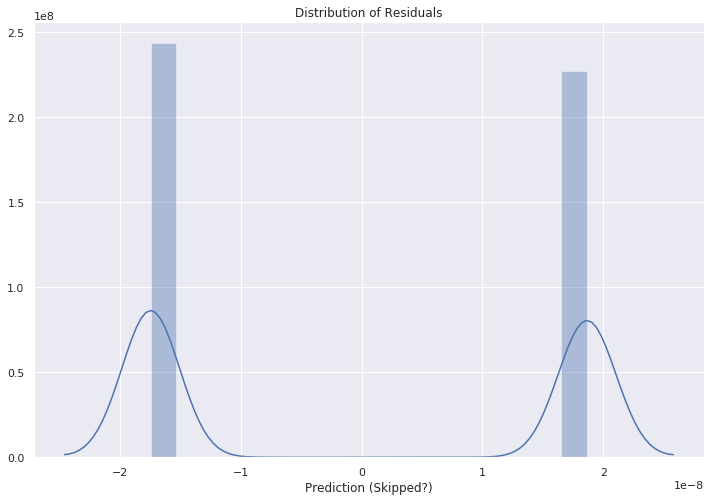

In [ ]:
lgbm_probs = lgbm.predict_proba(X_test)[:,1]
lgmb_residuals = (lgbm_probs - y_test).sort_values()

plt.figure(figsize=(12,8))
sns.distplot(lgmb_residuals)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction (Skipped?)")
plt.show()

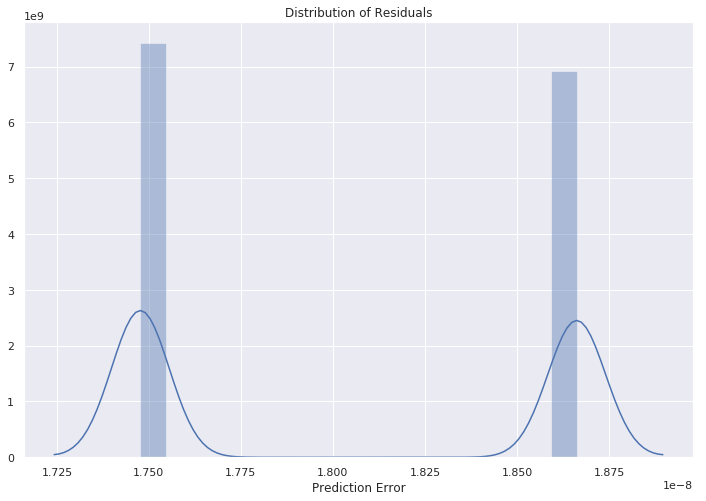

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(np.abs(lgmb_residuals))
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()

In [351]:

threshold = 0.6
print("Proportion of Residuals (Greater than %.2f):  %.4f" % (
    threshold,
    (np.abs(lgmb_residuals) > threshold).sum() / lgmb_residuals.count()
))

Proportion of Residuals (Greater than 0.60):  0.0000


In [353]:
target_residuals = np.abs(lgmb_residuals) > threshold
target_residuals = target_residuals.sort_index()
target_residuals.head()

5     False
9     False
14    False
15    False
21    False
Name: skipped, dtype: bool

In [352]:
X_test.sort_index().head()

,session_position,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,1,0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
4,5,0,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
12,13,1,192.973328,2018.0,99.995728,0.442507,0.585637,0.692979,0.792691,10.926849,...,4.0,0.306544,-0.800501,0.270084,0.259297,0.089380,-0.324667,0.030543,-0.431700,0.233430
20,1,1,328.733337,1993.0,98.808350,0.000027,0.183969,0.150195,0.215750,4.110182,...,4.0,0.237204,0.185752,0.275915,-0.242243,-0.384358,0.580225,0.107189,-0.256305,0.222407
22,3,0,257.760010,1979.0,99.996307,0.246984,0.808209,0.835049,0.852841,12.370526,...,4.0,0.594732,-0.203833,0.127260,0.176826,-0.043112,-0.059270,0.047184,-0.045565,0.025914


In [354]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41970 entries, 35021 to 127779
Data columns (total 60 columns):
session_position                   41970 non-null int64
skipped                            41970 non-null int32
duration                           41970 non-null float32
release_year                       41970 non-null float32
us_popularity_estimate             41970 non-null float32
acousticness                       41970 non-null float32
beat_strength                      41970 non-null float32
bounciness                         41970 non-null float32
danceability                       41970 non-null float32
dyn_range_mean                     41970 non-null float32
energy                             41970 non-null float32
flatness                           41970 non-null float32
instrumentalness                   41970 non-null float32
key                                41970 non-null float32
liveness                           41970 non-null float32
loudness            

In [355]:

# Sort the columns by lgbm's feature importance value
columns_to_compare, _ = zip(*sorted(zip(X.columns, lgbm.feature_importances_),key=lambda p:p[1],reverse=True))
columns_to_compare[:10]

('duration',
 'session_position',
 'us_popularity_estimate',
 'skipped',
 'acousticness',
 'release_year',
 'beat_strength',
 'dyn_range_mean',
 'loudness',
 'bounciness')

In [356]:
def plot(column):
    plt.figure(figsize=(8,4))
    sns.distplot(
        X_test[column][target_residuals],
        label="Residual > 0.6"
    )
    sns.distplot(
        X_test[column][~target_residuals],
        label="Residual < 0.6"
    )
   
    plt.show()
    return

In [357]:
plot("us_popularity_estimate")

IndexingError: ignored

<Figure size 576x288 with 0 Axes>

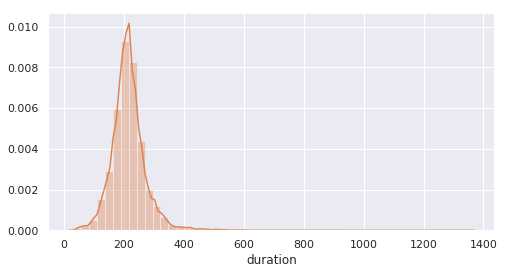

In [ ]:

plot("duration")

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


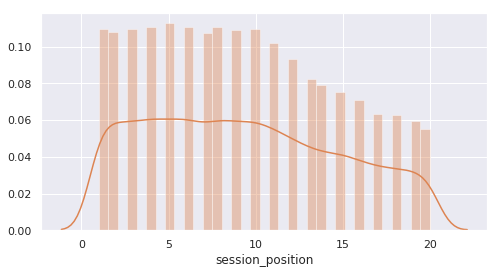

In [ ]:
plot("session_position")

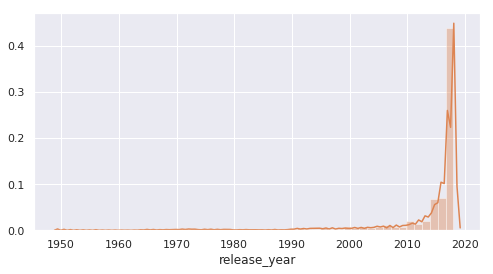

In [ ]:
plot("release_year")

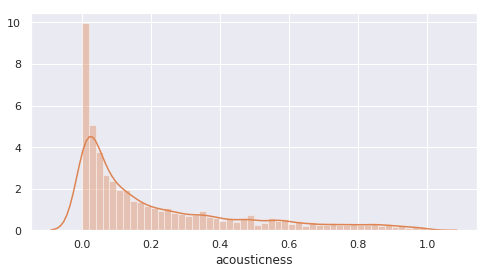

In [ ]:
plot("acousticness")

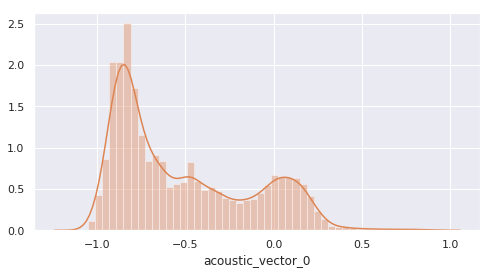

In [ ]:
plot("acoustic_vector_0")

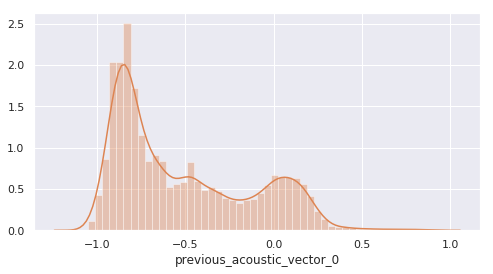

In [ ]:
plot("previous_acoustic_vector_0")

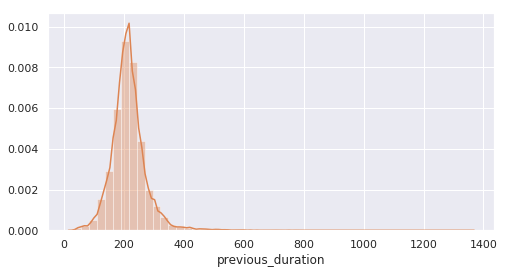

In [ ]:
plot("previous_duration")

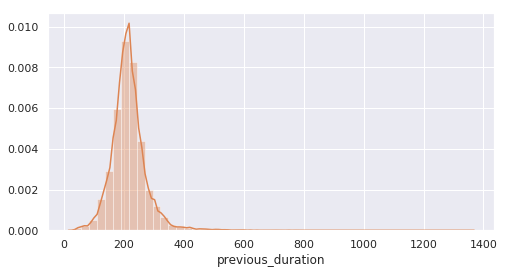

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(
    X_test["previous_duration"][target_residuals & (X_test["previous_duration"] > -2000)],
    label="Residual > 0.6"
)
sns.distplot(
    X_test["previous_duration"][~target_residuals & (X_test["previous_duration"] > -2000)],
    label="Residual < 0.6"
)
 
plt.show()

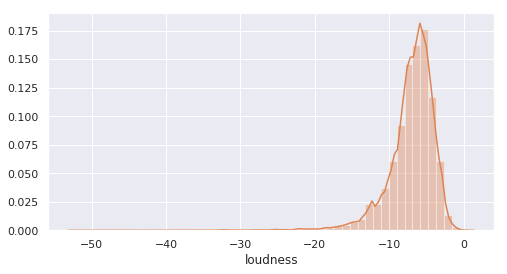

In [ ]:
plot("loudness")

In [ ]:
full_session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,...,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,...,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,...,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,...,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,...,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [ ]:

session_ids = full_session_data.session_id.unique()
session_ids.shape

(10000,)

In [ ]:
past_sessions = [
    "0_05eb4c83-e0bd-4e12-b65e-9ccd18b39ef9"
]

In [ ]:
rid = np.random.choice(session_ids)
rid

'0_02c3302e-275a-475f-83e3-2134364ac3a4'

In [ ]:

session = full_session_data[full_session_data.session_id == rid]
session

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
31567,0_02c3302e-275a-475f-83e3-2134364ac3a4,1,0,t_4bb4aa96-286c-4111-9d2c-5b70a58254f0,180.705856,2017.0,99.993439,0.075381,0.675018,0.717269,...,4.0,0.397611,-0.857026,0.324052,0.232974,0.105377,-0.280931,-0.015095,-0.499598,0.155529
31568,0_02c3302e-275a-475f-83e3-2134364ac3a4,2,1,t_c715445f-7477-4140-be5b-154960feb225,292.910034,2016.0,99.989410,0.049758,0.603967,0.699223,...,4.0,0.126208,-0.838639,0.300243,0.253836,0.107511,-0.260531,0.034642,-0.430724,0.232634
31569,0_02c3302e-275a-475f-83e3-2134364ac3a4,3,0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,239.835785,2018.0,100.000000,0.349092,0.483979,0.487409,...,4.0,0.218147,-0.816745,0.406897,0.236413,-0.042040,-0.299926,0.034196,-0.566873,0.174116
31570,0_02c3302e-275a-475f-83e3-2134364ac3a4,4,0,t_42d15744-c948-489e-a92b-9e664c170b57,206.266663,2018.0,99.999847,0.493359,0.617372,0.671652,...,4.0,0.505237,-0.667074,0.368517,0.268151,-0.065803,-0.360194,0.076523,-0.361174,0.195589
31571,0_02c3302e-275a-475f-83e3-2134364ac3a4,5,0,t_bb59dff3-8b08-4fab-9ac0-ed4f5d3eee57,203.907715,2017.0,99.999306,0.156511,0.731464,0.711446,...,4.0,0.459517,-0.835371,0.417171,0.250480,-0.006625,-0.297633,0.043337,-0.510203,0.160536
31572,0_02c3302e-275a-475f-83e3-2134364ac3a4,6,1,t_77633777-013a-40e2-87c1-7a4f0fdb4a4b,157.557236,2018.0,99.997307,0.202925,0.723210,0.777901,...,4.0,0.211504,-0.825640,0.295691,0.190924,0.122480,-0.276322,-0.041999,-0.440564,0.181985
31573,0_02c3302e-275a-475f-83e3-2134364ac3a4,7,0,t_90fb83b4-81bd-449b-8b29-6173028ecd58,137.173874,2017.0,99.998329,0.149892,0.697679,0.782548,...,4.0,0.712556,-0.155284,0.135781,0.100487,-0.247824,-0.119555,0.205062,-0.106868,0.181833
31574,0_02c3302e-275a-475f-83e3-2134364ac3a4,8,1,t_04b40984-0fb4-4a96-ac2a-9fc86db28ae2,169.912018,2016.0,99.974838,0.000319,0.514031,0.520507,...,4.0,0.171009,-0.735771,0.307999,0.162650,0.042894,-0.380145,0.010802,-0.403015,0.278459
31575,0_02c3302e-275a-475f-83e3-2134364ac3a4,9,1,t_23bd20f1-a31e-4f18-9ea7-87b9e5978aef,121.066673,2018.0,99.976662,0.010492,0.624272,0.676601,...,3.0,0.711090,-0.943311,0.339631,0.195755,0.117723,-0.384868,-0.063534,-0.570314,0.241103
31576,0_02c3302e-275a-475f-83e3-2134364ac3a4,10,0,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,232.959137,2018.0,99.999977,0.023649,0.776539,0.806856,...,4.0,0.341744,-0.899932,0.328876,0.252109,0.133214,-0.286828,-0.000055,-0.491611,0.145450


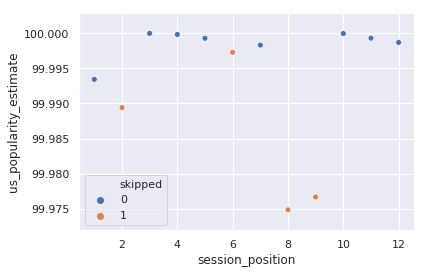

In [ ]:
sns.scatterplot(
    session.session_position,
    session.us_popularity_estimate,
    hue=session.skipped
)

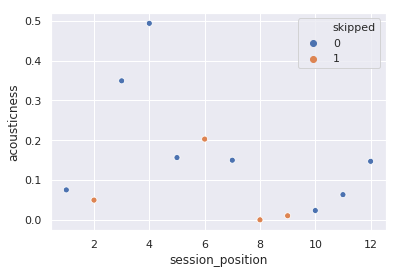

In [ ]:

sns.scatterplot(
    session.session_position,
    session.acousticness,
    hue=session.skipped
)

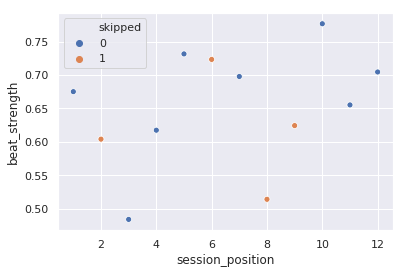

In [ ]:

sns.scatterplot(
    session.session_position,
    session.beat_strength,
    hue=session.skipped
)

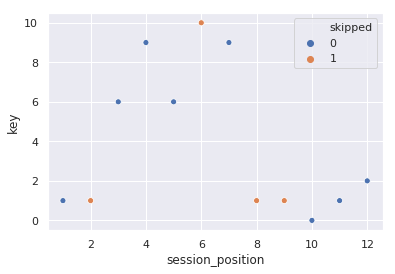

In [ ]:
sns.scatterplot(
    session.session_position,
    session.key,
    hue=session.skipped
)

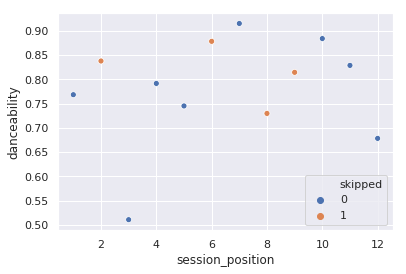

In [ ]:
sns.scatterplot(
    session.session_position,
    session.danceability,
    hue=session.skipped
)

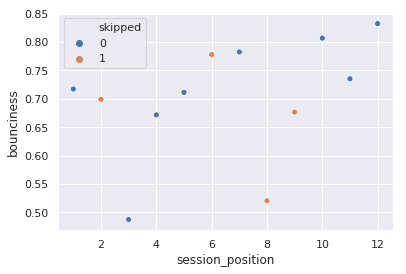

In [ ]:
sns.scatterplot(
    session.session_position,
    session.bounciness,
    hue=session.skipped
)

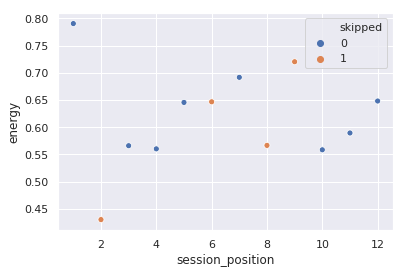

In [ ]:
sns.scatterplot(
    session.session_position,
    session.energy,
    hue=session.skipped
)

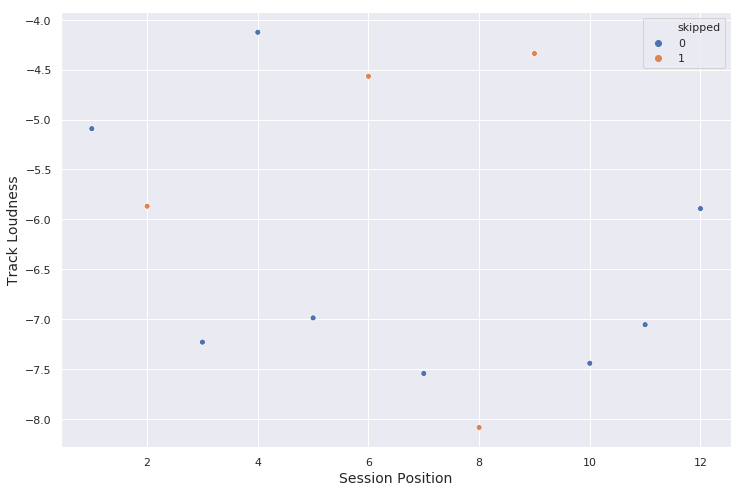

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    session.session_position,
    session.loudness,
    hue=session.skipped
)
 
plt.xlabel(
    "Session Position",
    fontsize=14
)
plt.ylabel(
    "Track Loudness",
    fontsize=14
)
 
plt.show()

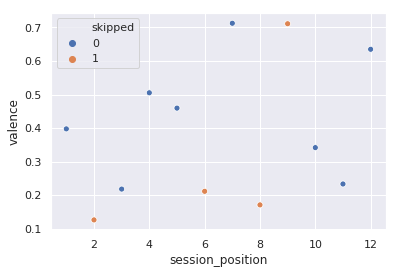

In [ ]:
sns.scatterplot(
    session.session_position,
    session.valence,
    hue=session.skipped
)

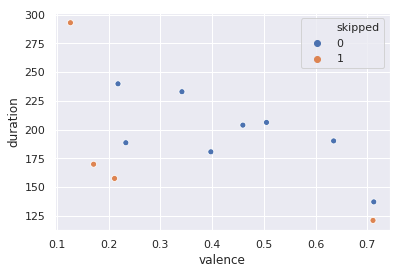

In [ ]:
sns.scatterplot(
    session.valence,
    session.duration,
    hue=session.skipped
)

In [ ]:
full_session_data.skipped.sum() / full_session_data.skipped.count()

0

In [ ]:
acoustic = {
    "Willie Nelson": 0.48,
    "Wu-Tang Clan": 0.032,
    "John Coltrane": 0.732
    }

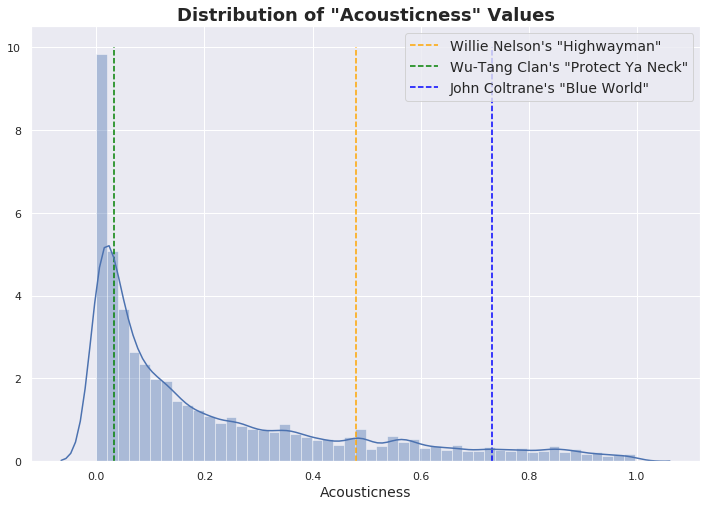

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.acousticness
)
plt.title(
    "Distribution of \"Acousticness\" Values",
    fontweight='bold',
    fontsize=18
)

plt.vlines(
    0.48,
    0,
    10,
    label="Willie Nelson's \"Highwayman\"",
    colors='orange',
    linestyles='dashed'
)
plt.vlines(
    0.032,
    0,
    10,
    label="Wu-Tang Clan's \"Protect Ya Neck\"",
    colors='green',
    linestyles='dashed'
)
plt.vlines(
    0.732,
    0,
    10,
    label="John Coltrane's \"Blue World\"",
    colors='blue',
    linestyles='dashed'
)
plt.legend(
    fontsize=14
)
plt.xlabel(
    "Acousticness",
    fontsize=14
)
#plt.savefig("images/feature_eda/acousticness_distribution.png")
plt.show()

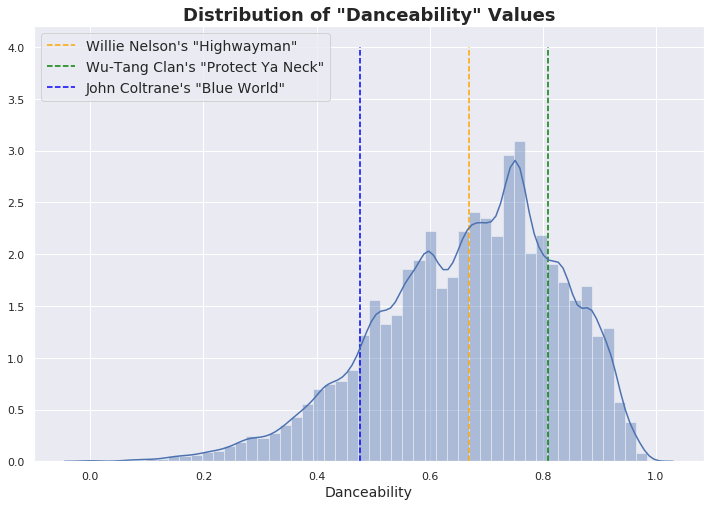

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.danceability
)
plt.title(
    "Distribution of \"Danceability\" Values",
    fontweight='bold',
    fontsize=18
)

plt.vlines(
    0.67,
    0,
    4,
    label="Willie Nelson's \"Highwayman\"",
    colors='orange',
    linestyles='dashed'
)
plt.vlines(
    0.81,
    0,
    4,
    label="Wu-Tang Clan's \"Protect Ya Neck\"",
    colors='green',
    linestyles='dashed'
)
plt.vlines(
    0.477,
    0,
    4,
    label="John Coltrane's \"Blue World\"",
    colors='blue',
    linestyles='dashed'
)
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Danceability",
    fontsize=14
)
 
plt.show()

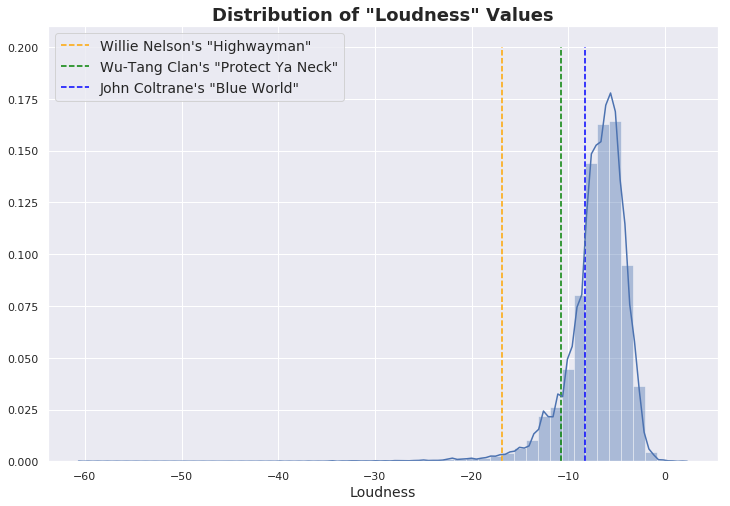

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.loudness
)
plt.title(
    "Distribution of \"Loudness\" Values",
    fontweight='bold',
    fontsize=18
)

plt.vlines(
    -16.842,
    0,
    0.2,
    label="Willie Nelson's \"Highwayman\"",
    colors='orange',
    linestyles='dashed'
)
plt.vlines(
    -10.8,
    0,
    0.2,
    label="Wu-Tang Clan's \"Protect Ya Neck\"",
    colors='green',
    linestyles='dashed'
)
plt.vlines(
    -8.301,
    0,
    0.2,
    label="John Coltrane's \"Blue World\"",
    colors='blue',
    linestyles='dashed'
)
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Loudness",
    fontsize=14
)
 
plt.show()

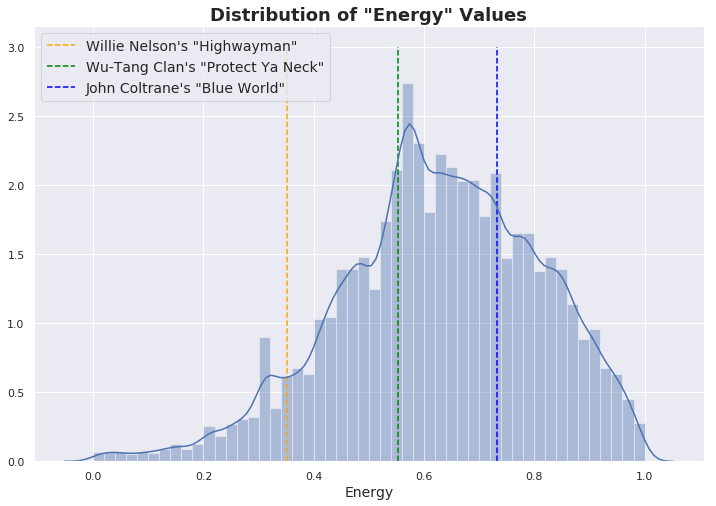

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.energy
)
plt.title(
    "Distribution of \"Energy\" Values",
    fontweight='bold',
    fontsize=18
)

plt.vlines(
    0.351,
    0,
    3,
    label="Willie Nelson's \"Highwayman\"",
    colors='orange',
    linestyles='dashed'
)
plt.vlines(
    0.552,
    0,
    3,
    label="Wu-Tang Clan's \"Protect Ya Neck\"",
    colors='green',
    linestyles='dashed'
)
plt.vlines(
    0.733,
    0,
    3,
    label="John Coltrane's \"Blue World\"",
    colors='blue',
    linestyles='dashed'
)
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Energy",
    fontsize=14
)
 
plt.show()